<a href="https://colab.research.google.com/github/t1p0kgod/DeepLearn/blob/main/work4/%D0%97%D0%BE%D0%BB%D0%BE%D1%82%D0%BA%D0%BE%D0%B2_4_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
# Пути
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/")))
model_path = "/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/CNN_model.h5"
images_path = "/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/images_CNN.pickle"
label_path = "/content/drive/MyDrive/DEEP LEARN ^_^/Dataset/labels_CNN.pickle"
test_images = "/content/drive/MyDrive/DEEP LEARN ^_^/Test_images/"

In [ ]:
#загружаем данные с диска
data = np.array(0)
labels = []
with open(images_path,'rb') as f:
  data = pickle.load(f)
with open(label_path,'rb') as f:
  labels = pickle.load(f)

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
trainX = np.array(trainX)/255
testX = np.array(testX)/255
labels = np.array(labels)

In [ ]:
from keras.utils import to_categorical
# Создаем словарь для классификации предсказаний
classes_dict = {'Radish': 0, 'Cucumber': 1, 'Potato': 2}

# Классифицируем значения
y_train_num = np.array([classes_dict[i] for i in trainY])
y_test_num = np.array([classes_dict[i] for i in testY])

trainY = to_categorical(y_train_num)
testY = to_categorical(y_test_num)

In [ ]:
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)
print('Train: y = ', trainY.shape)
print('Test: y = ', testY.shape)

Train: X =  (2250, 64, 64, 3)
Test: X =  (750, 64, 64, 3)
Train: y =  (2250, 3)
Test: y =  (750, 3)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow import keras

model_1 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=( 64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3,  activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        36896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)        

In [ ]:
# Adam compile rate function
def adamCompiler(model,lr): 
  from keras.optimizers import Adam
  opt = Adam(learning_rate=lr)
  model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
adamCompiler(model_1,lr)

In [ ]:
# Обучаем модель
his1 = model_1.fit(trainX, trainY, batch_size=bs, epochs=50, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 11s 67ms/step - loss: 1.0905 - accuracy: 0.3300 - val_loss: 1.0802 - val_accuracy: 0.3489
Epoch 2/50
18/18 [==============================] - 1s 36ms/step - loss: 1.0674 - accuracy: 0.3300 - val_loss: 1.0441 - val_accuracy: 0.3489
Epoch 3/50
18/18 [==============================] - 1s 35ms/step - loss: 1.0242 - accuracy: 0.3300 - val_loss: 0.9904 - val_accuracy: 0.3511
Epoch 4/50
18/18 [==============================] - 1s 34ms/step - loss: 0.9643 - accuracy: 0.4022 - val_loss: 0.9249 - val_accuracy: 0.4756
Epoch 5/50
18/18 [==============================] - 1s 35ms/step - loss: 0.8845 - accuracy: 0.5622 - val_loss: 0.8225 - val_accuracy: 0.6600
Epoch 6/50
18/18 [==============================] - 1s 35ms/step - loss: 0.7659 - accuracy: 0.7267 - val_loss: 0.6866 - val_accuracy: 0.7844
Epoch 7/50
18/18 [==============================] - 1s 35ms/step - loss: 0.6136 - accuracy: 0.8106 - val_loss: 0.5518 - val_accuracy: 0.7911
Epoch 8/50
1

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow import keras

model_2 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=( 64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3,  activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        36896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)        

In [ ]:
# Компилируем модель
adamCompiler(model_2,0.00001)

In [ ]:
# Обучаем модель
his2 = model_2.fit(trainX, trainY, batch_size=50, epochs=50, validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 2s 27ms/step - loss: 1.1084 - accuracy: 0.3328 - val_loss: 1.0960 - val_accuracy: 0.3667
Epoch 2/50
36/36 [==============================] - 1s 19ms/step - loss: 1.0532 - accuracy: 0.3711 - val_loss: 1.0932 - val_accuracy: 0.4444
Epoch 3/50
36/36 [==============================] - 1s 22ms/step - loss: 1.0133 - accuracy: 0.4433 - val_loss: 1.0877 - val_accuracy: 0.5000
Epoch 4/50
36/36 [==============================] - 1s 22ms/step - loss: 0.9798 - accuracy: 0.4806 - val_loss: 1.0795 - val_accuracy: 0.5067
Epoch 5/50
36/36 [==============================] - 1s 22ms/step - loss: 0.9474 - accuracy: 0.5033 - val_loss: 1.0676 - val_accuracy: 0.5111
Epoch 6/50
36/36 [==============================] - 1s 22ms/step - loss: 0.9141 - accuracy: 0.5217 - val_loss: 1.0532 - val_accuracy: 0.5089
Epoch 7/50
36/36 [==============================] - 1s 24ms/step - loss: 0.8828 - accuracy: 0.5372 - val_loss: 1.0351 - val_accuracy: 0.5267
Epoch 8/50
36

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

model_3 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=( 64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout (0.5),
    Dense(3,  activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        36896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)        

In [ ]:
# Компилируем модель
adamCompiler(model_3,lr)

In [ ]:
# Обучаем модель
his3 = model_3.fit(trainX, trainY, batch_size=bs, epochs=120, validation_split=0.2)

Epoch 1/120
18/18 [==============================] - 1s 50ms/step - loss: 1.0930 - accuracy: 0.3928 - val_loss: 1.0820 - val_accuracy: 0.6911
Epoch 2/120
18/18 [==============================] - 1s 35ms/step - loss: 1.0711 - accuracy: 0.5106 - val_loss: 1.0476 - val_accuracy: 0.6489
Epoch 3/120
18/18 [==============================] - 1s 36ms/step - loss: 1.0238 - accuracy: 0.5644 - val_loss: 0.9703 - val_accuracy: 0.7111
Epoch 4/120
18/18 [==============================] - 1s 36ms/step - loss: 0.9330 - accuracy: 0.6372 - val_loss: 0.8704 - val_accuracy: 0.8067
Epoch 5/120
18/18 [==============================] - 1s 35ms/step - loss: 0.8624 - accuracy: 0.6322 - val_loss: 0.7629 - val_accuracy: 0.8200
Epoch 6/120
18/18 [==============================] - 1s 35ms/step - loss: 0.7811 - accuracy: 0.6728 - val_loss: 0.6745 - val_accuracy: 0.8356
Epoch 7/120
18/18 [==============================] - 1s 35ms/step - loss: 0.7385 - accuracy: 0.6806 - val_loss: 0.6136 - val_accuracy: 0.8511
Epoch 

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
# Создаем архитектуру сверточной нейронной сети
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow import keras

model_4 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=( 64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(8, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout (0.5),
    Dense(3,  activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        36896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)        

In [ ]:
# Компилируем модель
adamCompiler(model_4,0.00001)

In [ ]:
# Обучаем модель
his4 = model_4.fit(trainX, trainY, batch_size=30, epochs=200, validation_split=0.2)

Epoch 1/200
60/60 [==============================] - 2s 16ms/step - loss: 1.4055 - accuracy: 0.3478 - val_loss: 1.0958 - val_accuracy: 0.4311
Epoch 2/200
60/60 [==============================] - 1s 13ms/step - loss: 1.1474 - accuracy: 0.4028 - val_loss: 1.0896 - val_accuracy: 0.5222
Epoch 3/200
60/60 [==============================] - 1s 13ms/step - loss: 1.0457 - accuracy: 0.4739 - val_loss: 1.0805 - val_accuracy: 0.6222
Epoch 4/200
60/60 [==============================] - 1s 13ms/step - loss: 0.9922 - accuracy: 0.5256 - val_loss: 1.0660 - val_accuracy: 0.6689
Epoch 5/200
60/60 [==============================] - 1s 14ms/step - loss: 0.9371 - accuracy: 0.5733 - val_loss: 1.0433 - val_accuracy: 0.6978
Epoch 6/200
60/60 [==============================] - 1s 13ms/step - loss: 0.8969 - accuracy: 0.6022 - val_loss: 1.0116 - val_accuracy: 0.7156
Epoch 7/200
60/60 [==============================] - 1s 13ms/step - loss: 0.8437 - accuracy: 0.6656 - val_loss: 0.9651 - val_accuracy: 0.7689
Epoch 

### Задание 5. Постройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

In [ ]:
#Оцениваем потери и точность обучения
def evaluateGraph(model ,his,modelname):
  model.evaluate(testX, testY)

  plt.style.use("ggplot")
  plt.figure()
  plt.plot( his.history["loss"], label="train_loss")
  plt.plot( his.history["val_loss"], label="val_loss")
  plt.plot( his.history["accuracy"], label="train_accuracy")
  plt.plot( his.history["val_accuracy"], label="val_accuracy")
  plt.title(f"{modelname}")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

24/24 [==============================] - 1s 12ms/step - loss: 0.0350 - accuracy: 0.9907


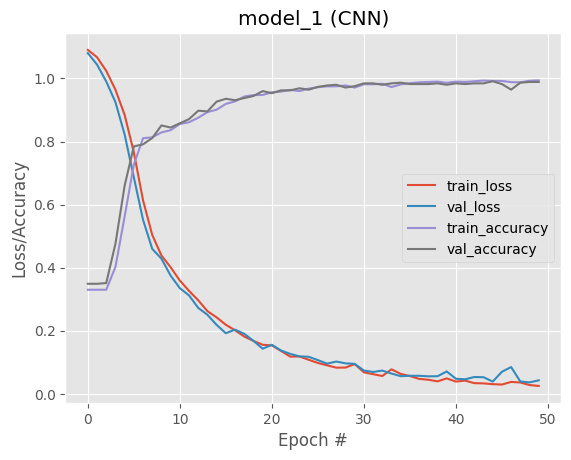

In [ ]:
evaluateGraph(model_1, his1, 'model_1 (CNN)')

24/24 [==============================] - 0s 5ms/step - loss: 0.0719 - accuracy: 0.9867


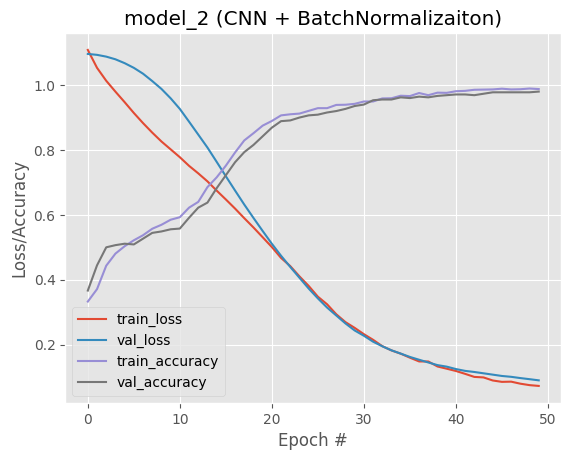

In [ ]:
evaluateGraph(model_2, his2, 'model_2 (CNN + BatchNormalizaiton)')

24/24 [==============================] - 0s 6ms/step - loss: 0.0213 - accuracy: 0.9947


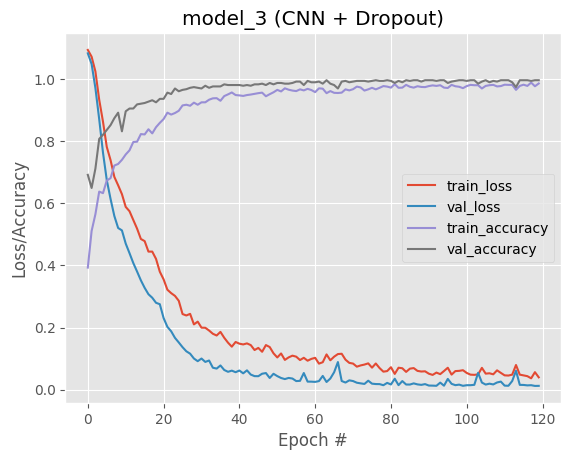

In [ ]:
evaluateGraph(model_3, his3, 'model_3 (CNN + Dropout)')

24/24 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 0.9960


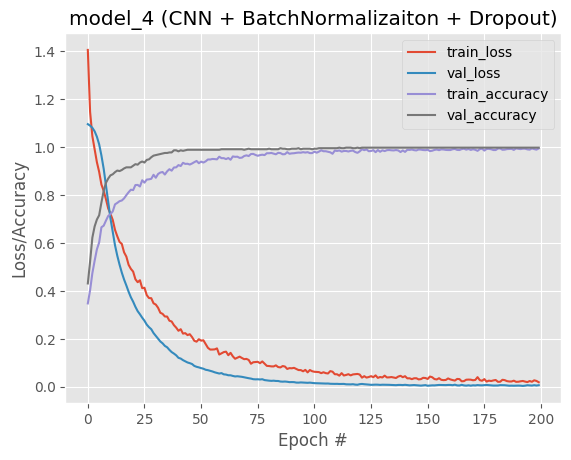

In [ ]:
evaluateGraph(model_4, his4, 'model_4 (CNN + BatchNormalizaiton + Dropout)')

In [ ]:
def eval(model):
  predictions = model.predict(testX, batch_size=32)
  print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1)))

In [ ]:
eval(model_1)
eval(model_2)
eval(model_3)
eval(model_4)

24/24 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       239
           1       1.00      1.00      1.00       262
           2       0.98      1.00      0.99       249

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

24/24 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       239
           1       1.00      0.99      1.00       262
           2       0.99      0.98      0.98       249

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

24/24 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.99 

#Вывод

model_1 - CNN 

model_2 - CNN с BatchNormalization

model_3 - CNN с Dropout

model_4 - CNN с BatchNormalization и Dropout

Вывод:

Все нейросети обучились хорошо, но model_4 - обучилась лучше всех, с самой высокой точностью.

#Подведение итогов
В результате выяснили, что batchNormalization следует использовать для ускорения обучения, а DropOut для снижения ошибки, комбинируя batchNormalization и DropOut можно добиться наилучшего результата.

В данной работе лучше всего обучилась model_4 с использованием Dropout и batchNormalizatio